In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data/training_dataset.csv')

# Display the first few rows
df.head()

# Drop missing values
df = df.dropna()

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Check the shape of features and labels
print(f"Features shape: {X.shape}, Labels shape: {y.shape}")


Features shape: (18285, 4), Labels shape: (18285,)


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Download stopwords
nltk.download('stopwords')

# Initialize PorterStemmer
ps = PorterStemmer()

# Dataset preprocessing
messages = X.copy()
messages.reset_index(inplace=True)

corpus = []
for i in range(0, len(messages)):
    try:
        # Remove special characters and keep only alphabets
        review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
        review = review.lower()  # Convert to lowercase
        review = review.split()  # Tokenize
        # Remove stopwords and apply stemming
        review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)  # Rejoin the cleaned words
        corpus.append(review)
    except KeyError:
        print(f"KeyError: Unable to find key {i} in the 'messages' DataFrame.")

# Display a sample from the cleaned corpus
print(corpus[1])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


flynn hillari clinton big woman campu breitbart


In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define vocabulary size and sequence length
voc_size = 5000
sent_len = 20

# Convert corpus to one-hot encoded representations
onehot_repr = [one_hot(words, voc_size) for words in corpus]

# Pad sequences to ensure uniform length
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_len)

# Display a sample padded document
print(embedded_docs[1])


[   0    0    0    0    0    0    0    0    0    0    0    0    0  752
 3925  545 1459  697 4173  584]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define embedding vector features
emb_vector_feat = 40

# Initialize the model
model = Sequential()
model.add(Embedding(voc_size, emb_vector_feat, input_length=sent_len))
model.add(LSTM(100))  # Add LSTM layer with 100 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convert data to NumPy arrays
X_final = np.array(embedded_docs)
y_final = np.array(y)

# Split the data into training and testing sets (90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")


Training data shape: (9142, 20), Testing data shape: (9143, 20)


In [ ]:
# Train the model and save training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.7594 - loss: 0.4721 - val_accuracy: 0.9102 - val_loss: 0.2085
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9357 - loss: 0.1616 - val_accuracy: 0.9209 - val_loss: 0.2047
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.9639 - loss: 0.0985 - val_accuracy: 0.9186 - val_loss: 0.2075
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9804 - loss: 0.0633 - val_accuracy: 0.9196 - val_loss: 0.2720
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9865 - loss: 0.0436 - val_accuracy: 0.9180 - val_loss: 0.2659


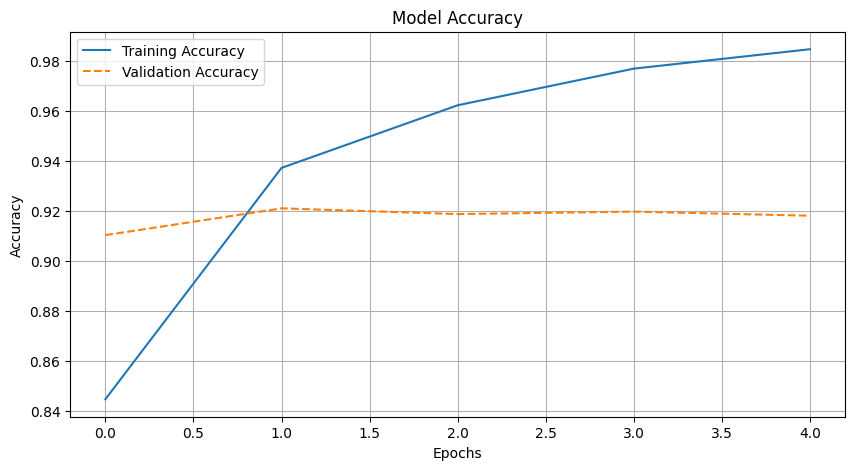

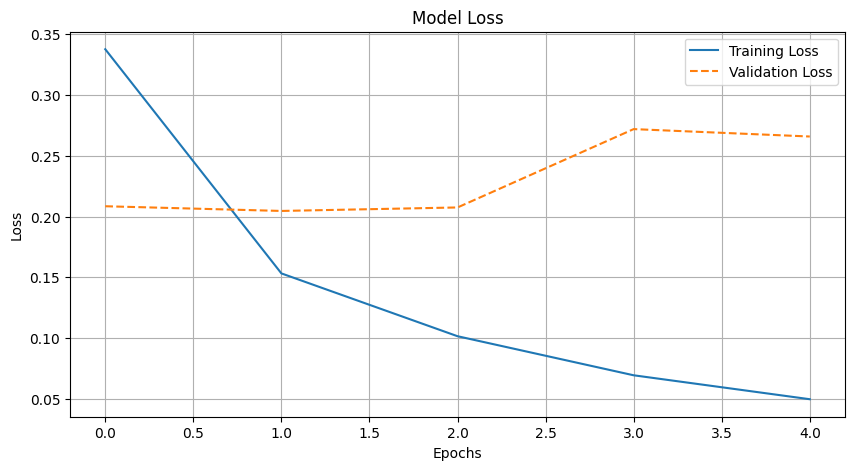

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Generate predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions (1 if prob > 0.5, else 0)
y_pred = np.where(y_pred > 0.5, 1, 0)

# Display predictions
print(y_pred[:10])


286/286 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Accuracy score
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[4665  516]
 [ 234 3728]]

Accuracy Score:
0.9179700317182544

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93      5181
           1       0.88      0.94      0.91      3962

    accuracy                           0.92      9143
   macro avg       0.92      0.92      0.92      9143
weighted avg       0.92      0.92      0.92      9143

